In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [5]:
# Load the dataset
df = pd.read_csv("ab_data.csv")
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
# Filter inconsistent data: keep only control->old_page and treatment->new_page
df_clean = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
              ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
df_clean.shape


(290585, 5)

In [9]:
# Conversion summary
conversion_rates = df_clean.groupby('group')['converted'].agg(['mean', 'count', 'sum'])
conversion_rates = conversion_rates.rename(columns={
    'mean': 'conversion_rate',
    'count': 'total_users',
    'sum': 'conversions'
})
conversion_rates


,conversion_rate,total_users,conversions
group,,,
control,0.120386,145274,17489
treatment,0.118807,145311,17264


In [11]:
# Extract values
n_control = conversion_rates.loc['control', 'total_users']
n_treatment = conversion_rates.loc['treatment', 'total_users']
x_control = conversion_rates.loc['control', 'conversions']
x_treatment = conversion_rates.loc['treatment', 'conversions']

# Calculate statistics
p_control = x_control / n_control
p_treatment = x_treatment / n_treatment
p_pool = (x_control + x_treatment) / (n_control + n_treatment)
std_error = (p_pool * (1 - p_pool) * (1/n_control + 1/n_treatment)) ** 0.5
z_score = (p_treatment - p_control) / std_error
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")


Z-score: -1.3116
P-value: 0.9052


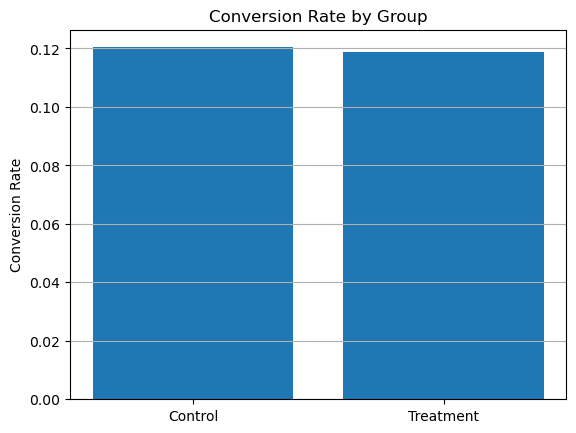

In [13]:
# Plot conversion rates
plt.bar(['Control', 'Treatment'], [p_control, p_treatment])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.grid(axis='y')
plt.show()
